<!-- # Task 1: Top Cuisines
1-Determine the top three most common cuisines in the dataset.
2-Calculate the percentage of restaurants that serve each of the top cuisines.  

Task 2:  City Analysis
1-Identify the city with the highest number of restaurants in the dataset.
2-Calculate the average rating for restaurants in each city.
3-Determine the city with the highest average rating.


Task-3: Price Range Distribution
1-Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
2-Calculate the percentage of restaurants in each price range category.


Task-4: Online Delivery
1-Determine the percentage of restaurants that offer online delivery.
2-Compare the average ratings of restaurants with and without online delivery.


Task-5: Restaurant Ratings
1-Analyze the distribution of aggregate ratings and determine the most common rating range.
2-Calculate the average number of votes received by restaurants.
 -->

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [81]:
# Load the dataset
dataset=pd.read_csv('Dataset .csv')

In [5]:
# identify the number of rows and columns
dataset.shape

(4411, 21)

In [6]:
# to check the columns name
dataset.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [82]:
# to show top 5 rows
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


#### Task 1 Top Cuisines

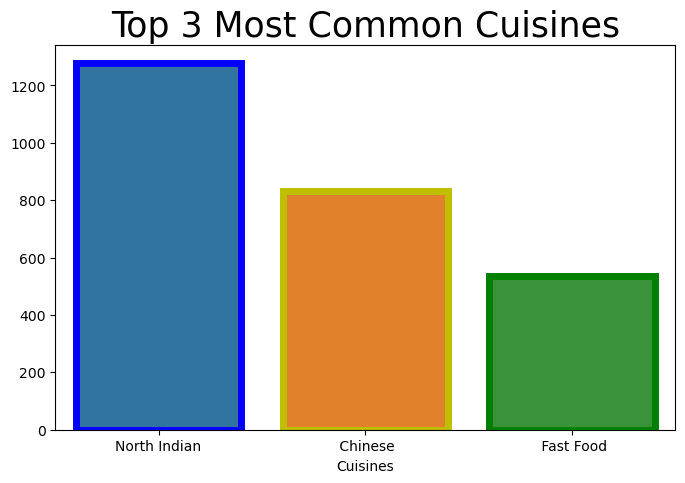

In [10]:
#Task 1

#1-Determine the top three most common cuisines in the dataset.

cuisines_dataset=dataset['Cuisines'].str.split(',').explode().value_counts().head(3)
top_3_cuisines_dataset=cuisines_dataset.sort_values(ascending=False)

# plot the graph by using 
fig,Ax=plt.subplots(figsize=(8,5))
c=['b','y','g']
plt.title('Top 3 Most Common Cuisines',fontsize=25)
sns.barplot(x=cuisines_dataset.index,y=top_3_cuisines_dataset.values,ax=Ax,alpha=1,edgecolor=c,linewidth=5)        #b=blue
plt.show()


# done

##### 1-Identify the city with the highest number of restaurants in the dataset.


In [46]:
# highest number of restaurants
highest_number_o_dataset_restaurants=dataset['City'].value_counts().head(1)
highest_number_o_dataset_restaurants

City
New Delhi    1851
Name: count, dtype: int64

##### 2-Calculate the percentage of restaurants that serve each of the top cuisines.  

In [47]:
highest_restaurants=len(dataset)
percenatge_cuisines=((top_3_cuisines_dataset/highest_restaurants) *100)
percenatge_cuisines=percenatge_cuisines.to_frame()

# rename the column name count to Percentage
percenatge_cuisines = percenatge_cuisines.rename(columns={'count': 'Percantage'})
percenatge_cuisines

,Percantage
Cuisines,
North Indian,28.973022
Chinese,18.861936
Fast Food,12.151440


##### 3-Determine the city with the highest average rating.


In [57]:
highest_avg_ratings=dataset.groupby('City')['Aggregate rating'].mean().head(1)
highest_avg_ratings

City
Abu Dhabi    4.3
Name: Aggregate rating, dtype: float64

#### Task 2:  City Analysis

##### 2-Calculate the average rating for restaurants in each city.

In [36]:
# 2-Calculate the average rating for restaurants in each city.
rating=dataset.groupby(['City','Restaurant Name'])['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating=rating.reset_index()
avg_rating = avg_rating.rename(columns={'Aggregate rating': 'Average Rating'})
avg_rating

,City,Restaurant Name,Average Rating
0,Dalton,Oakwood Cafe,4.9
1,Davenport,Tantra Asian Bistro,4.9
2,Agra,Sheroes Hangout,4.9
3,Pasig City,Silantro Fil-Mex,4.9
4,Pensacola,McGuire's Irish Pub & Brewery,4.9
...,...,...,...
3911,New Delhi,Tandoori Tadka,0.0
3912,New Delhi,Pak Afghan Restaurant,0.0
3913,New Delhi,Chatkara,0.0
3914,Gurgaon,Oven Aroma,0.0


##### 3-Determine the city with the highest average rating.


In [62]:
# Determine the city with the highest average rating.

city_highest_avg=dataset.groupby('City')['Aggregate rating']
print("\033[1;31mHIGHEST AVGERAGE RATING\n\033[0m",city_highest_avg.mean().sort_values(ascending=False).head(1))


HIGHEST AVGERAGE RATING
 City
Quezon City    4.8
Name: Aggregate rating, dtype: float64


#### Task-3: Price Range Distribution


##### 1-Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

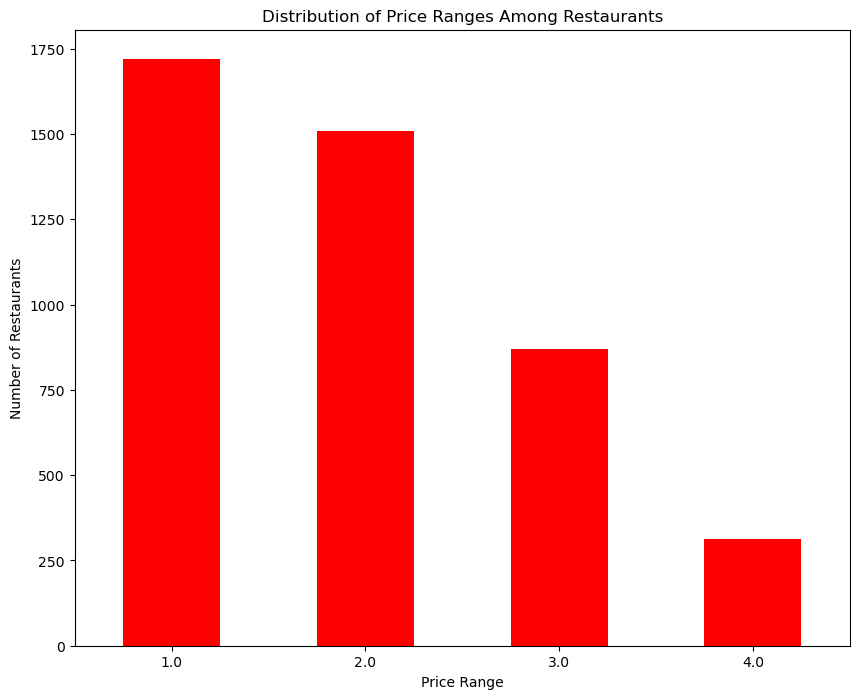

In [65]:
# 1-Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.x=


price_range_counts = dataset['Price range'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 8))
price_range_counts.plot(kind='bar', color='red')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()
# snsplot(data=dataset,x='Price range',kind='bar',y='Restaurant Name',element='step')


##### 2-Calculate the percentage of restaurants in each price range category.

In [75]:
price_range_counts = dataset['Price range'].value_counts()

#total number of restaurants
total_restaurants = len(dataset)

# Step 3: Calculate the percentage of restaurants in each price range
price_range_percentages = (price_range_counts / total_restaurants) * 100

# Output the result
print("Percentage of restaurants in each price range category:")
df=round(price_range_percentages,2).reset_index()
print(df)

Percentage of restaurants in each price range category:
   Price range  count
0          1.0  38.99
1          2.0  34.19
2          3.0  19.72
3          4.0   7.07


#### Task-4: Online Delivery


##### 1-Determine the percentage of restaurants that offer online delivery.
2-Compare the average ratings of restaurants with and without online delivery.

In [80]:
# Calculate the percentage of restaurants 
total_restaurants = len(dataset)
restaurants_with_delivery = len(dataset[dataset['Has Online delivery'] =="Yes"])
percentage_with_delivery = (restaurants_with_delivery / total_restaurants) * 100

print(f'Percentage of restaurants offering online delivery: {percentage_with_delivery:.2f}%')

# Compare the avg ratings of restaurants with and without online delivery
avg_rating_with_delivery = dataset[dataset['Has Online delivery'] == "Yes"]['Aggregate rating'].mean()
avg_rating_without_delivery = dataset[dataset['Has Online delivery'] == "No"]['Aggregate rating'].mean()

print(f'Average rating for restaurants with online delivery: {avg_rating_with_delivery:.2f}')
print(f'Average rating for restaurants without online delivery: {avg_rating_without_delivery:.2f}')

Percentage of restaurants offering online delivery: 26.37%
Average rating for restaurants with online delivery: 3.38
Average rating for restaurants without online delivery: 2.84
